# Fusing Variables PhysHlth and MentHlth

This is of interest to me because it seems these two variables had extremely low entropy values at 0 which is what we wanted to see but when I ran the decision trees these variables werent very predictive so I will fuse the two variabls and run another decision tree to see if this changes anything 

In [41]:
# Convert "PhysHlth" and "MentHlth" categories to integers
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)

# Fuse the two columns into a new categorical column "HlthComb"
df["HlthComb"] = df["PhysHlth"].astype(str) + "_" + df["MentHlth"].astype(str)
cat_type = pd.api.types.CategoricalDtype(categories=["1_1", "1_2", "1_3", "2_1", "2_2", "2_3", "3_1", "3_2", "3_3"], ordered=True)
df["HlthComb"] = df["HlthComb"].astype(cat_type)

# Drop the original columns "PhysHtlh" and "MentHlth"
#df = df.drop(["PhysHlth", "MentHlth"], axis=1)

In [42]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HlthComb
0,0.0,1.0,1.0,1.0,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,2,2,1.0,0.0,9.0,4.0,3.0,2_2
1,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1,1,0.0,0.0,7.0,6.0,1.0,1_1
2,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,3,3,1.0,0.0,9.0,4.0,8.0,3_3
3,0.0,1.0,0.0,1.0,2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1,1,0.0,0.0,11.0,3.0,6.0,1_1
4,0.0,1.0,1.0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1,1,0.0,0.0,11.0,5.0,4.0,1_1


In [43]:
df_HlthComb = df.drop(["PhysHlth", "MentHlth"], axis=1)
print(df_HlthComb.dtypes)

HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
CholCheck               category
BMI                     category
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
HlthComb                category
dtype: object


In [44]:
df_HlthComb.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,HlthComb
0,0.0,1.0,1.0,1.0,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,2_2
1,0.0,0.0,0.0,0.0,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1_1
2,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,3_3
3,0.0,1.0,0.0,1.0,2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1_1
4,0.0,1.0,1.0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1_1


In [45]:
print(df_HlthComb['HlthComb'].unique())

['2_2', '1_1', '3_3', '2_1', '3_1', '1_2', '1_3', '3_2', '2_3']
Categories (9, object): ['1_1' < '1_2' < '1_3' < '2_1' ... '2_3' < '3_1' < '3_2' < '3_3']


In [46]:
df_HlthComb.to_csv('df_HlthComb.csv', index=False)

# Load the data // dtype category specified to load all data as categories
df_HlthComb = pd.read_csv('df_HlthComb.csv', dtype='category')
df_HlthComb.index.name = 'case'

#making sure all columns we want are present
print(df_HlthComb.dtypes)

HeartDiseaseorAttack    category
HighBP                  category
HighChol                category
CholCheck               category
BMI                     category
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
HlthComb                category
dtype: object


In [47]:
# Encode the categorical variables as numeric using LabelEncoder
le5 = LabelEncoder()
for col in df_HlthComb.columns:
    if df_HlthComb[col].dtype == 'category':
        df_HlthComb[col] = le5.fit_transform(df_HlthComb[col])

# Define the predictor and target variables
X5 = df_HlthComb.drop(['HeartDiseaseorAttack'], axis=1)
y5 = df_HlthComb['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Create a decision tree model
dt5 = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt5.fit(X_train5, y_train5)

# Plot the decision tree
#dont need to plot, not legible and very taxing on computer/ takes long time to run
#plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)

DecisionTreeClassifier(random_state=42)

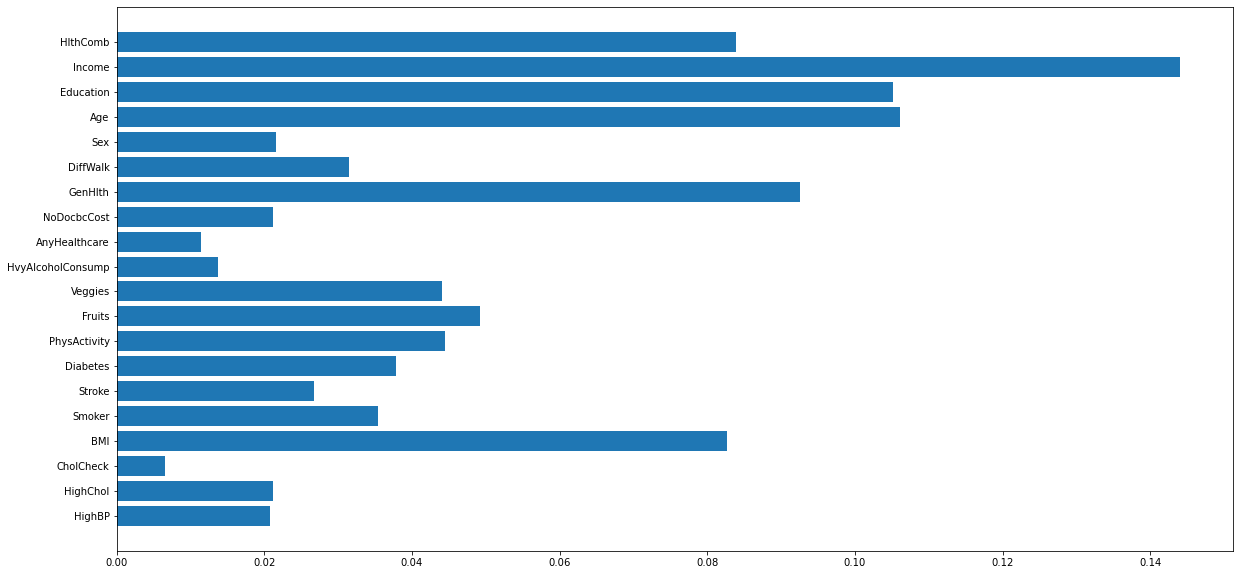

In [48]:
# Feature Importance based on decision tree model

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.barh(X_train5.columns, dt5.feature_importances_)
plt.show()

Interesting finding here is when we combine PhysHlth and MentHlth to column HlthComb, that new category Hlth_Comb becomes a signinficant predictor 

## Running the Decision Tree for HD+Stroke with Fused Data HlthComb

In [49]:
# Load the dataframes
df_HlthComb = pd.read_csv('df_HlthComb.csv', dtype='category')
df_hd_stroke = pd.read_csv('df_hd_stroke.csv', dtype='category')

# Select the 'HD+Stroke' column from df_hd_stroke
hd_stroke = df_hd_stroke['HD+Stroke']

# Concatenate the two dataframes along axis=1
hd_stroke_HlthComb = pd.concat([df_HlthComb, hd_stroke], axis=1)

In [50]:
hd_stroke_HlthComb = hd_stroke_HlthComb.drop(["HeartDiseaseorAttack", "Stroke"], axis=1)
#print(hd_stroke_HlthComb.dtypes)

In [51]:
#df_hd_stroke csv will be fused HD+Stroke data
hd_stroke_HlthComb.to_csv('hd_stroke_HlthComb.csv', index=False)

# Load the data // dtype category specified to load all data as categories

hd_stroke_HlthComb = pd.read_csv('hd_stroke_HlthComb.csv', dtype='category')
hd_stroke_HlthComb.index.name = 'case'

#making sure all columns we want are present
print(hd_stroke_HlthComb.dtypes)

HighBP               category
HighChol             category
CholCheck            category
BMI                  category
Smoker               category
Diabetes             category
PhysActivity         category
Fruits               category
Veggies              category
HvyAlcoholConsump    category
AnyHealthcare        category
NoDocbcCost          category
GenHlth              category
DiffWalk             category
Sex                  category
Age                  category
Education            category
Income               category
HlthComb             category
HD+Stroke            category
dtype: object


In [52]:
# Encode the categorical variables as numeric using LabelEncoder
le6 = LabelEncoder()
for col in hd_stroke_HlthComb.columns:
    if hd_stroke_HlthComb[col].dtype == 'category':
        hd_stroke_HlthComb[col] = le6.fit_transform(hd_stroke_HlthComb[col])

# Define the predictor and target variables
X6 = hd_stroke_HlthComb.drop(['HD+Stroke'], axis=1)
y6 = hd_stroke_HlthComb['HD+Stroke']

# Split the data into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)

# Create a decision tree model
dt6 = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt6.fit(X_train6, y_train6)

# Plot the decision tree
#dont need to plot, not legible and very taxing on computer/ takes long time to run
#plot_tree(dt, feature_names=X.columns, class_names=['0','1'], filled=True)

DecisionTreeClassifier(random_state=42)

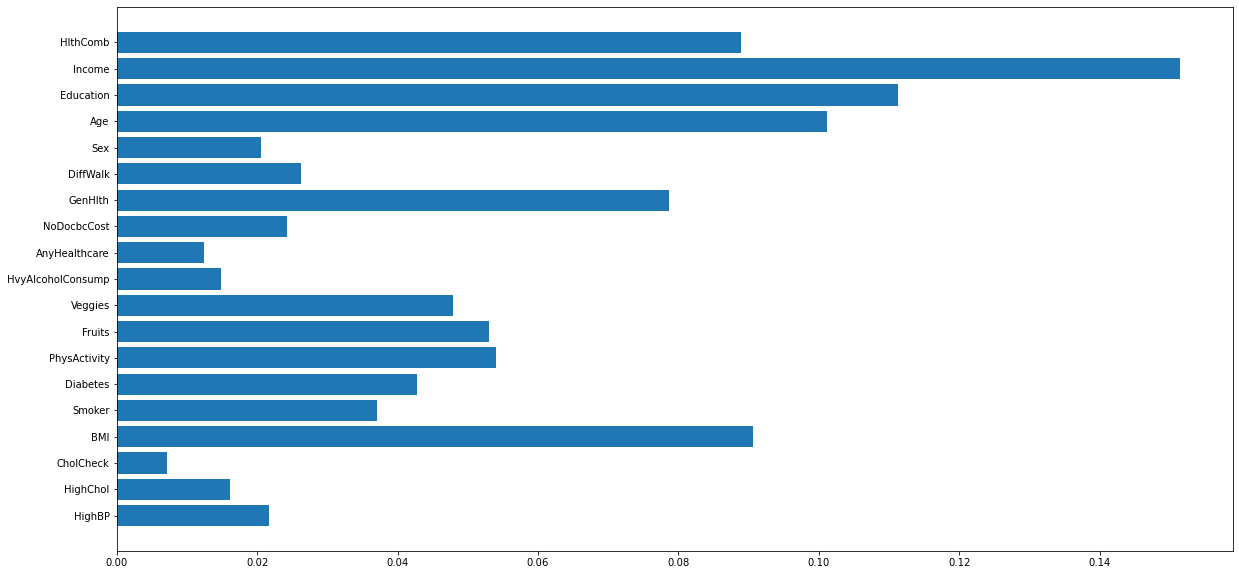

In [53]:
# Feature Importance based on decision tree model

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.barh(X_train6.columns, dt6.feature_importances_)
plt.show()

Findings are consistent with the original data as well

# Key Take Aways from Fusing PhysHlth and MentHlth

After fusing the two varaibles to make the new variable "HlthComb" it has given us more predictive power in both cases testing it against response HeartDiseaseorAttack and HD+Stroke data

# Final Take Aways from Decision Trees

After looking back at entropy and realizing that PhysHlth and MentHlth had really low entropies, I wanted to go back and explore with these two variables. After fusing these two variables I got some interesting insight in that **Income, Education, Age, GenHlth, and BMI** stayed consistent with predictive power but now **HlthComb** is also considered a significant predictor. So all in all the significant predictors include: **Income, Education, Age, GenHlth, BMI, and HlthComb**